In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


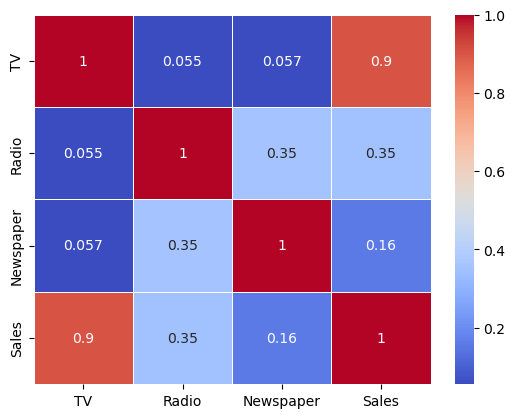

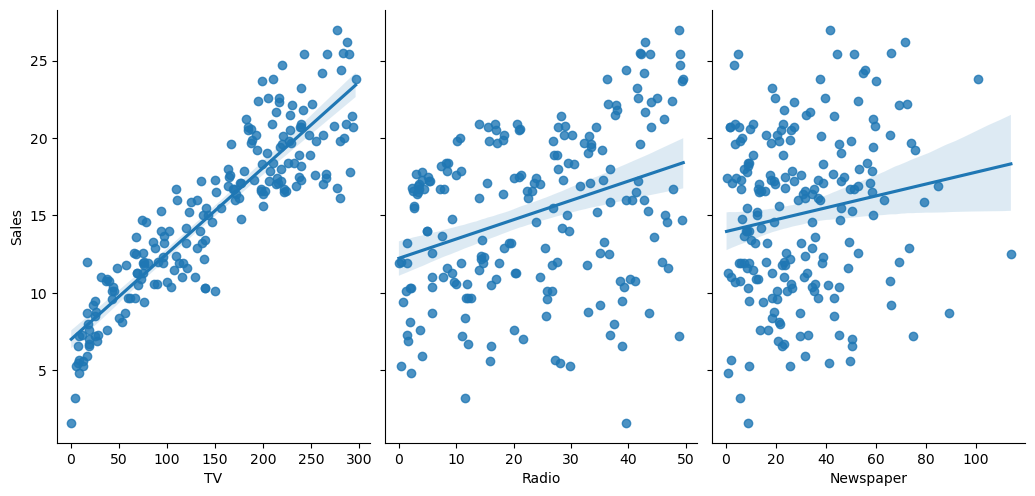

In [5]:

# Descriptive Statistics
desc_stats = df.describe()
desc_stats
# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Visualizations
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='reg')


In [6]:
desc_stats

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x29e6ad56d30>,
 'caps': [<matplotlib.lines.Line2D at 0x29e6ad562b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29e6ad56790>],
 'medians': [<matplotlib.lines.Line2D at 0x29e69cb9d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x29e69cb9670>],
 'means': []}

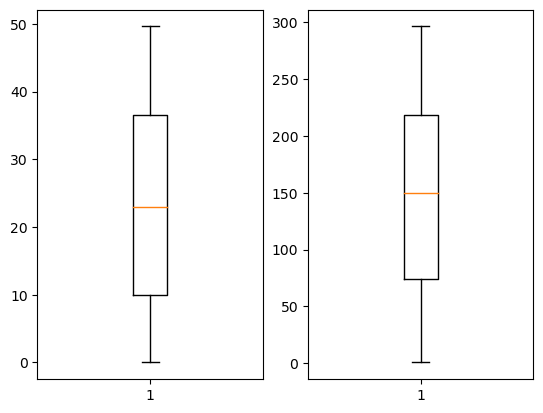

In [17]:
plt.subplot(122)
plt.boxplot(x='TV',data=df)
plt.subplot(121)
plt.boxplot(x='Radio',data=df)

(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <BarContainer object of 10 artists>)

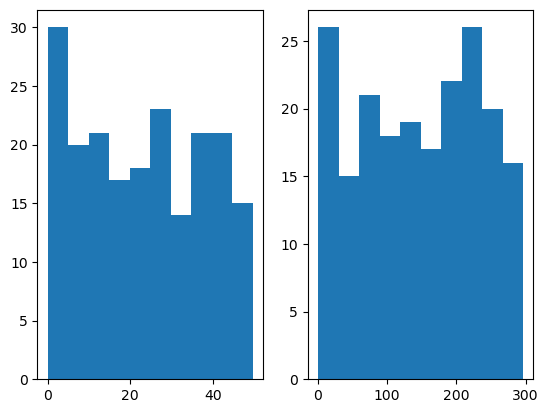

In [23]:
plt.subplot(122)
plt.hist(df.TV)
plt.subplot(121)
plt.hist(df.Radio)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
intercept = model.intercept_
intercept


4.7141264022141325

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [26]:
from sklearn.metrics import accuracy_score, classification_report


In [33]:
model.score(X_test,y_test)


0.9059011844150826

In [12]:
average_sales_by_channel = df.groupby(['TV', 'Radio', 'Newspaper'])['Sales'].mean().reset_index()

In [13]:
average_sales_by_channel

,TV,Radio,Newspaper,Sales
0,0.7,39.6,8.7,1.6
1,4.1,11.6,5.7,3.2
2,5.4,29.9,9.4,5.3
3,7.3,28.1,41.4,5.5
4,7.8,38.9,50.6,6.6
...,...,...,...,...
195,289.7,42.3,51.2,25.4
196,290.7,4.1,8.5,17.8
197,292.9,28.3,43.2,21.4
198,293.6,27.7,1.8,20.7
